In [ ]:
from expansion_tools.blob_expansion_tools_jetset import *
from processing.fix_numba_issue import load_model

from jetset.data_loader import Data,ObsData
from jetset.plot_sedfit import PlotSED


## Notebook to run the simulations with radiative+adiabatic cooling, necessary for the analysis in Section 5, Section 5.1, Section 5.2, and Section 5.3

In [2]:
sed_data = ObsData(data_table=Data.from_file('sed_mrk421_mjd_56302.ecsv'))
fit_model=load_model()

In [3]:
rest_frame='obs'
delta_t_out=1E3
t_exp=1E7

## loading flaring state simulation

In [4]:
from jetset.jet_timedep import JetTimeEvol
temp_ev_acc_flare=JetTimeEvol.load_model('temp_ev_sim_flare/temp_ev_acc_flare.pkl')
R0=temp_ev_acc_flare.rad_region.jet.parameters.R.val

def delta_t_est(t_exp,R0,beta_exp):
    return t_exp+R0/(beta_exp*3E10)

def t_dec_est(R0,a,beta_exp):
    return ((R0+beta_exp*3E10)*np.power(beta_exp*3E10,a))

beta_exp=np.logspace(-3,np.log10(0.3),10)

print(R0/1E15,temp_ev_acc_flare.rad_region.jet.parameters.beam_obj.val,temp_ev_acc_flare.rad_region.jet.parameters.z_cosm.val)

5.0 30 0.0308


Set `run=False` if you have already run the simulations, and you want only to regenerate lcs or SEDs

In [6]:
run=True

for ID,v in enumerate(beta_exp):
    duration=delta_t_est(t_exp,R0,v)+10*t_dec_est(R0,-1,v)
    T_SIZE=np.int(duration/1000)
    NUM_SET=np.int(T_SIZE)
    NUM_SET=min(5000,NUM_SET)
    NUM_SET=max(1000,NUM_SET)
    print('ID',ID)
    print('beta_exp %f'%v)
    print('delta_t  est. %e (d)'%(delta_t_est(t_exp,R0,v)/86400))
    print('t_dec  est. %e (d)'%(t_dec_est(R0,-1,v)/86400))
    print('delta_t  est. %e (s)'%(delta_t_est(t_exp,R0,v)))
    print('t_dec  est. %e (s)'%(t_dec_est(R0,-1,v)))
    print('duration %e'%duration)
    print('T_SIZE %d'%T_SIZE)
    print('NUM_SET %d'%NUM_SET)
    run_adiabatic_exp(sed_data,
                      fit_model,
                      'temp_ev_sim_exp_change_beta',
                      temp_ev_acc_flare,
                      flare_duration=0,
                      duration=duration,
                      delta_t_out=delta_t_out,
                      T_esc_rad=1E60,
                      rest_frame=rest_frame,
                      T_SIZE=T_SIZE,
                      NUM_SET=NUM_SET,
                      run=run,
                      beta_exp=v,
                      t_exp=t_exp)
    
   
    print('----------------------------------------------')

ID 0
beta_exp 0.001000
delta_t  est. 2.044753e+03 (d)
t_dec  est. 1.929012e+03 (d)
delta_t  est. 1.766667e+08 (s)
t_dec  est. 1.666667e+08 (s)
duration 1.843333e+09
T_SIZE 1843333
NUM_SET 5000
==> par: z_cosm from model: jet_leptonicacc_region linked to same parameter in model jet_leptonic
temporal evolution running


  0%|          | 0/1843333 [00:00<?, ?it/s]

temporal evolution completed
caching SED for each saved distribution: start


  0%|          | 0/5000 [00:00<?, ?it/s]

caching SED for each saved distribution: done
10000000.0 10000000.0 1843333343.3333333
t1=027 t2=000, t2_R=0.000e+00, R2=5.00000e+15 t/t_ref=0.000 t/t_exp=0.000 t/duration=0.000 1.00002e+00
t1=027 t2=555, t2_R=2.050e+08, R2=1.08453e+16 t/t_ref=20.481 t/t_exp=20.481 t/duration=0.111 1.00002e+00
t1=027 t2=1111, t2_R=4.100e+08, R2=1.69904e+16 t/t_ref=40.963 t/t_exp=40.963 t/duration=0.222 1.00002e+00
t1=027 t2=1666, t2_R=6.146e+08, R2=2.31245e+16 t/t_ref=61.444 t/t_exp=61.444 t/duration=0.333 9.99860e-01
t1=027 t2=2222, t2_R=8.195e+08, R2=2.92696e+16 t/t_ref=81.926 t/t_exp=81.926 t/duration=0.445 9.98165e-01
t1=027 t2=2777, t2_R=1.024e+09, R2=3.54036e+16 t/t_ref=102.407 t/t_exp=102.407 t/duration=0.556 9.88924e-01
t1=027 t2=3333, t2_R=1.229e+09, R2=4.15488e+16 t/t_ref=122.889 t/t_exp=122.889 t/duration=0.667 9.63642e-01
t1=027 t2=3888, t2_R=1.434e+09, R2=4.76828e+16 t/t_ref=143.370 t/t_exp=143.370 t/duration=0.778 9.23619e-01
t1=027 t2=4444, t2_R=1.639e+09, R2=5.38279e+16 t/t_ref=163.852 

  0%|          | 0/982760 [00:00<?, ?it/s]

temporal evolution completed
caching SED for each saved distribution: start


  0%|          | 0/5000 [00:00<?, ?it/s]

caching SED for each saved distribution: done
10000000.0 10000000.0 982760090.0696834
t1=050 t2=000, t2_R=0.000e+00, R2=5.00000e+15 t/t_ref=0.000 t/t_exp=0.000 t/duration=0.000 1.00003e+00
t1=050 t2=555, t2_R=1.093e+08, R2=1.06096e+16 t/t_ref=10.920 t/t_exp=10.920 t/duration=0.111 1.00004e+00
t1=050 t2=1111, t2_R=2.186e+08, R2=1.67842e+16 t/t_ref=21.839 t/t_exp=21.839 t/duration=0.222 1.00004e+00
t1=050 t2=1666, t2_R=3.277e+08, R2=2.29477e+16 t/t_ref=32.759 t/t_exp=32.759 t/duration=0.333 9.99911e-01
t1=050 t2=2222, t2_R=4.369e+08, R2=2.91223e+16 t/t_ref=43.678 t/t_exp=43.678 t/duration=0.445 9.98488e-01
t1=050 t2=2777, t2_R=5.460e+08, R2=3.52858e+16 t/t_ref=54.598 t/t_exp=54.598 t/duration=0.556 9.90556e-01
t1=050 t2=3333, t2_R=6.553e+08, R2=4.14604e+16 t/t_ref=65.517 t/t_exp=65.517 t/duration=0.667 9.67876e-01
t1=050 t2=3888, t2_R=7.644e+08, R2=4.76239e+16 t/t_ref=76.437 t/t_exp=76.437 t/duration=0.778 9.30451e-01
t1=050 t2=4444, t2_R=8.737e+08, R2=5.37985e+16 t/t_ref=87.356 t/t_exp=

  0%|          | 0/526143 [00:00<?, ?it/s]

temporal evolution completed
caching SED for each saved distribution: start


  0%|          | 0/5000 [00:00<?, ?it/s]

caching SED for each saved distribution: done
10000000.0 10000000.0 526143013.66027755
t1=095 t2=000, t2_R=0.000e+00, R2=5.00000e+15 t/t_ref=0.000 t/t_exp=0.000 t/duration=0.000 1.00006e+00
t1=095 t2=555, t2_R=5.851e+07, R2=1.01654e+16 t/t_ref=5.846 t/t_exp=5.846 t/duration=0.111 1.00006e+00
t1=095 t2=1111, t2_R=1.170e+08, R2=1.63956e+16 t/t_ref=11.692 t/t_exp=11.692 t/duration=0.222 1.00008e+00
t1=095 t2=1666, t2_R=1.754e+08, R2=2.26146e+16 t/t_ref=17.538 t/t_exp=17.538 t/duration=0.333 9.99983e-01
t1=095 t2=2222, t2_R=2.339e+08, R2=2.88447e+16 t/t_ref=23.384 t/t_exp=23.384 t/duration=0.445 9.98768e-01
t1=095 t2=2777, t2_R=2.923e+08, R2=3.50637e+16 t/t_ref=29.230 t/t_exp=29.230 t/duration=0.556 9.91704e-01
t1=095 t2=3333, t2_R=3.508e+08, R2=4.12939e+16 t/t_ref=35.076 t/t_exp=35.076 t/duration=0.667 9.70577e-01
t1=095 t2=3888, t2_R=4.092e+08, R2=4.75129e+16 t/t_ref=40.922 t/t_exp=40.922 t/duration=0.778 9.34497e-01
t1=095 t2=4444, t2_R=4.677e+08, R2=5.37431e+16 t/t_ref=46.768 t/t_exp=4

  0%|          | 0/283863 [00:00<?, ?it/s]

temporal evolution completed
caching SED for each saved distribution: start


  0%|          | 0/5000 [00:00<?, ?it/s]

caching SED for each saved distribution: done
10000000.0 10000000.0 283863633.4007156
t1=176 t2=000, t2_R=0.000e+00, R2=5.00000e+15 t/t_ref=0.000 t/t_exp=0.000 t/duration=0.000 1.00012e+00
t1=176 t2=555, t2_R=3.157e+07, R2=9.32812e+15 t/t_ref=3.154 t/t_exp=3.154 t/duration=0.111 1.00011e+00
t1=176 t2=1111, t2_R=6.313e+07, R2=1.56631e+16 t/t_ref=6.308 t/t_exp=6.308 t/duration=0.222 1.00016e+00
t1=176 t2=1666, t2_R=9.464e+07, R2=2.19865e+16 t/t_ref=9.462 t/t_exp=9.462 t/duration=0.333 1.00010e+00
t1=176 t2=2222, t2_R=1.262e+08, R2=2.83215e+16 t/t_ref=12.616 t/t_exp=12.616 t/duration=0.445 9.99119e-01
t1=176 t2=2777, t2_R=1.577e+08, R2=3.46451e+16 t/t_ref=15.770 t/t_exp=15.770 t/duration=0.556 9.92907e-01
t1=176 t2=3333, t2_R=1.893e+08, R2=4.09800e+16 t/t_ref=18.924 t/t_exp=18.924 t/duration=0.667 9.73033e-01
t1=176 t2=3888, t2_R=2.208e+08, R2=4.73035e+16 t/t_ref=22.078 t/t_exp=22.078 t/duration=0.778 9.37637e-01
t1=176 t2=4444, t2_R=2.524e+08, R2=5.36386e+16 t/t_ref=25.232 t/t_exp=25.232

  0%|          | 0/155311 [00:00<?, ?it/s]

temporal evolution completed
caching SED for each saved distribution: start


  0%|          | 0/5000 [00:00<?, ?it/s]

caching SED for each saved distribution: done
10000000.0 10000000.0 155311064.6695201
t1=321 t2=000, t2_R=0.000e+00, R2=5.00000e+15 t/t_ref=0.000 t/t_exp=0.000 t/duration=0.000 1.00023e+00
t1=321 t2=555, t2_R=1.727e+07, R2=7.75016e+15 t/t_ref=1.726 t/t_exp=1.726 t/duration=0.111 1.00016e+00
t1=321 t2=1111, t2_R=3.454e+07, R2=1.42827e+16 t/t_ref=3.451 t/t_exp=3.451 t/duration=0.222 1.00029e+00
t1=321 t2=1666, t2_R=5.178e+07, R2=2.08031e+16 t/t_ref=5.177 t/t_exp=5.177 t/duration=0.333 1.00030e+00
t1=321 t2=2222, t2_R=6.905e+07, R2=2.73356e+16 t/t_ref=6.903 t/t_exp=6.903 t/duration=0.445 9.99624e-01
t1=321 t2=2777, t2_R=8.629e+07, R2=3.38561e+16 t/t_ref=8.628 t/t_exp=8.628 t/duration=0.556 9.94552e-01
t1=321 t2=3333, t2_R=1.036e+08, R2=4.03886e+16 t/t_ref=10.354 t/t_exp=10.354 t/duration=0.667 9.76222e-01
t1=321 t2=3888, t2_R=1.208e+08, R2=4.69090e+16 t/t_ref=12.080 t/t_exp=12.080 t/duration=0.778 9.41210e-01
t1=321 t2=4444, t2_R=1.381e+08, R2=5.34415e+16 t/t_ref=13.805 t/t_exp=13.805 t/d

  0%|          | 0/87101 [00:00<?, ?it/s]

temporal evolution completed
caching SED for each saved distribution: start


  0%|          | 0/5000 [00:00<?, ?it/s]

caching SED for each saved distribution: done
10000000.0 10000000.0 87101533.55018133
t1=574 t2=000, t2_R=0.000e+00, R2=5.00000e+15 t/t_ref=0.000 t/t_exp=0.000 t/duration=0.000 1.00040e+00
t1=574 t2=555, t2_R=9.686e+06, R2=5.00000e+15 t/t_ref=0.968 t/t_exp=0.968 t/duration=0.111 1.00040e+00
t1=574 t2=1111, t2_R=1.937e+07, R2=1.16809e+16 t/t_ref=1.936 t/t_exp=1.936 t/duration=0.222 1.00049e+00
t1=574 t2=1666, t2_R=2.904e+07, R2=1.85728e+16 t/t_ref=2.903 t/t_exp=2.903 t/duration=0.333 1.00061e+00
t1=574 t2=2222, t2_R=3.873e+07, R2=2.54775e+16 t/t_ref=3.871 t/t_exp=3.871 t/duration=0.445 1.00032e+00
t1=574 t2=2777, t2_R=4.839e+07, R2=3.23694e+16 t/t_ref=4.839 t/t_exp=4.839 t/duration=0.556 9.96892e-01
t1=574 t2=3333, t2_R=5.808e+07, R2=3.92734e+16 t/t_ref=5.807 t/t_exp=5.807 t/duration=0.667 9.81140e-01
t1=574 t2=3888, t2_R=6.775e+07, R2=4.61661e+16 t/t_ref=6.775 t/t_exp=6.775 t/duration=0.778 9.46629e-01
t1=574 t2=4444, t2_R=7.743e+07, R2=5.30701e+16 t/t_ref=7.742 t/t_exp=7.742 t/duratio

  0%|          | 0/50909 [00:00<?, ?it/s]

temporal evolution completed
caching SED for each saved distribution: start


  0%|          | 0/5000 [00:00<?, ?it/s]

caching SED for each saved distribution: done
10000000.0 10000000.0 50909801.39391035
t1=982 t2=000, t2_R=0.000e+00, R2=5.00000e+15 t/t_ref=0.000 t/t_exp=0.000 t/duration=0.000 1.00068e+00
t1=982 t2=555, t2_R=5.662e+06, R2=5.00000e+15 t/t_ref=0.566 t/t_exp=0.566 t/duration=0.111 1.00068e+00
t1=982 t2=1111, t2_R=1.132e+07, R2=6.77768e+15 t/t_ref=1.131 t/t_exp=1.131 t/duration=0.222 1.00042e+00
t1=982 t2=1666, t2_R=1.697e+07, R2=1.43699e+16 t/t_ref=1.697 t/t_exp=1.697 t/duration=0.333 1.00105e+00
t1=982 t2=2222, t2_R=2.264e+07, R2=2.19755e+16 t/t_ref=2.263 t/t_exp=2.263 t/duration=0.445 1.00116e+00
t1=982 t2=2777, t2_R=2.829e+07, R2=2.95677e+16 t/t_ref=2.828 t/t_exp=2.828 t/duration=0.556 9.99732e-01
t1=982 t2=3333, t2_R=3.395e+07, R2=3.71733e+16 t/t_ref=3.394 t/t_exp=3.394 t/duration=0.667 9.88601e-01
t1=982 t2=3888, t2_R=3.960e+07, R2=4.47655e+16 t/t_ref=3.960 t/t_exp=3.960 t/duration=0.778 9.55820e-01
t1=982 t2=4444, t2_R=4.526e+07, R2=5.23711e+16 t/t_ref=4.525 t/t_exp=4.525 t/duratio

  0%|          | 0/31706 [00:00<?, ?it/s]

temporal evolution completed
caching SED for each saved distribution: start


  0%|          | 0/5000 [00:00<?, ?it/s]

caching SED for each saved distribution: done
10000000.0 10000000.0 31706598.3374405
t1=1576 t2=000, t2_R=0.000e+00, R2=5.00000e+15 t/t_ref=0.000 t/t_exp=0.000 t/duration=0.000 1.00123e+00
t1=1576 t2=555, t2_R=3.526e+06, R2=5.00000e+15 t/t_ref=0.352 t/t_exp=0.352 t/duration=0.111 1.00123e+00
t1=1576 t2=1111, t2_R=7.052e+06, R2=5.00000e+15 t/t_ref=0.705 t/t_exp=0.705 t/duration=0.222 1.00123e+00
t1=1576 t2=1666, t2_R=1.057e+07, R2=6.44630e+15 t/t_ref=1.057 t/t_exp=1.057 t/duration=0.333 1.00068e+00
t1=1576 t2=2222, t2_R=1.410e+07, R2=1.53744e+16 t/t_ref=1.409 t/t_exp=1.409 t/duration=0.445 1.00205e+00
t1=1576 t2=2777, t2_R=1.762e+07, R2=2.42849e+16 t/t_ref=1.761 t/t_exp=1.761 t/duration=0.556 1.00218e+00
t1=1576 t2=3333, t2_R=2.114e+07, R2=3.32130e+16 t/t_ref=2.114 t/t_exp=2.114 t/duration=0.667 9.97734e-01
t1=1576 t2=3888, t2_R=2.466e+07, R2=4.21234e+16 t/t_ref=2.466 t/t_exp=2.466 t/duration=0.778 9.71114e-01
t1=1576 t2=4444, t2_R=2.819e+07, R2=5.10516e+16 t/t_ref=2.818 t/t_exp=2.818 t

  0%|          | 0/21517 [00:00<?, ?it/s]

temporal evolution completed
caching SED for each saved distribution: start


  0%|          | 0/5000 [00:00<?, ?it/s]

caching SED for each saved distribution: done
10000000.0 10000000.0 21517447.786819056
t1=2323 t2=000, t2_R=0.000e+00, R2=5.00000e+15 t/t_ref=0.000 t/t_exp=0.000 t/duration=0.000 1.00225e+00
t1=2323 t2=555, t2_R=2.393e+06, R2=5.00000e+15 t/t_ref=0.239 t/t_exp=0.239 t/duration=0.111 1.00225e+00
t1=2323 t2=1111, t2_R=4.786e+06, R2=5.00000e+15 t/t_ref=0.478 t/t_exp=0.478 t/duration=0.222 1.00225e+00
t1=2323 t2=1666, t2_R=7.174e+06, R2=5.00000e+15 t/t_ref=0.717 t/t_exp=0.717 t/duration=0.333 1.00225e+00
t1=2323 t2=2222, t2_R=9.567e+06, R2=5.00000e+15 t/t_ref=0.956 t/t_exp=0.956 t/duration=0.445 1.00225e+00
t1=2323 t2=2777, t2_R=1.196e+07, R2=1.43306e+16 t/t_ref=1.195 t/t_exp=1.195 t/duration=0.556 1.00372e+00
t1=2323 t2=3333, t2_R=1.435e+07, R2=2.57504e+16 t/t_ref=1.434 t/t_exp=1.434 t/duration=0.667 1.00419e+00
t1=2323 t2=3888, t2_R=1.674e+07, R2=3.71463e+16 t/t_ref=1.674 t/t_exp=1.674 t/duration=0.778 9.92203e-01
t1=2323 t2=4444, t2_R=1.913e+07, R2=4.85661e+16 t/t_ref=1.913 t/t_exp=1.913

  0%|          | 0/16111 [00:00<?, ?it/s]

temporal evolution completed
caching SED for each saved distribution: start


  0%|          | 0/5000 [00:00<?, ?it/s]

caching SED for each saved distribution: done
10000000.0 10000000.0 16111121.111111112
t1=3103 t2=000, t2_R=0.000e+00, R2=5.00000e+15 t/t_ref=0.000 t/t_exp=0.000 t/duration=0.000 1.00495e+00
t1=3103 t2=555, t2_R=1.792e+06, R2=5.00000e+15 t/t_ref=0.179 t/t_exp=0.179 t/duration=0.111 1.00495e+00
t1=3103 t2=1111, t2_R=3.584e+06, R2=5.00000e+15 t/t_ref=0.358 t/t_exp=0.358 t/duration=0.222 1.00495e+00
t1=3103 t2=1666, t2_R=5.372e+06, R2=5.00000e+15 t/t_ref=0.537 t/t_exp=0.537 t/duration=0.333 1.00495e+00
t1=3103 t2=2222, t2_R=7.163e+06, R2=5.00000e+15 t/t_ref=0.716 t/t_exp=0.716 t/duration=0.445 1.00495e+00
t1=3103 t2=2777, t2_R=8.952e+06, R2=5.00000e+15 t/t_ref=0.895 t/t_exp=0.895 t/duration=0.556 1.00495e+00
t1=3103 t2=3333, t2_R=1.074e+07, R2=1.16831e+16 t/t_ref=1.074 t/t_exp=1.074 t/duration=0.667 1.00613e+00
t1=3103 t2=3888, t2_R=1.253e+07, R2=2.77731e+16 t/t_ref=1.253 t/t_exp=1.253 t/duration=0.778 1.00793e+00
t1=3103 t2=4444, t2_R=1.432e+07, R2=4.38811e+16 t/t_ref=1.432 t/t_exp=1.432

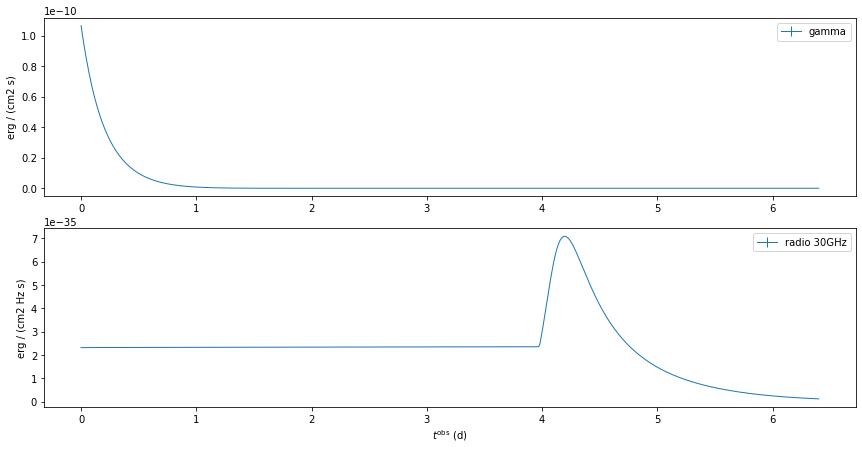

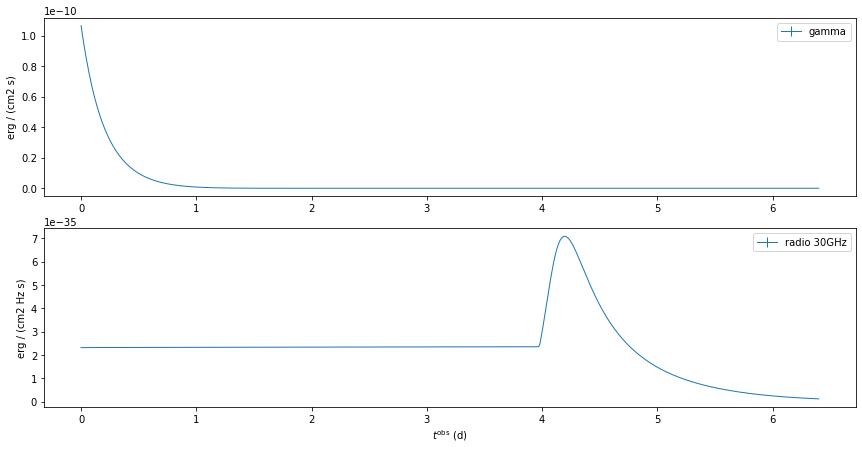

In [7]:
from expansion_tools.delay_analysis import plot_lcs

plot_lcs(exp_lcs='temp_ev_sim_exp_change_beta/lc_obs_beta_exp=0.300.pkl',lcs_names=['lg_obs','lr_obs_30GHz'],flare_lcs=None)


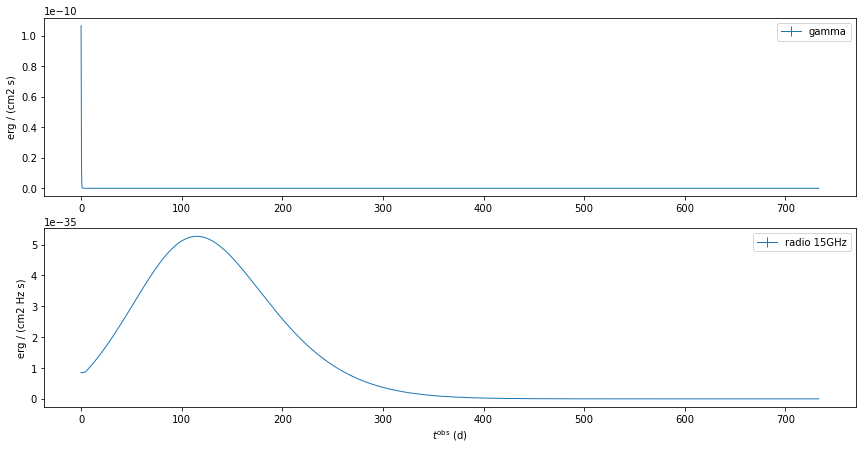

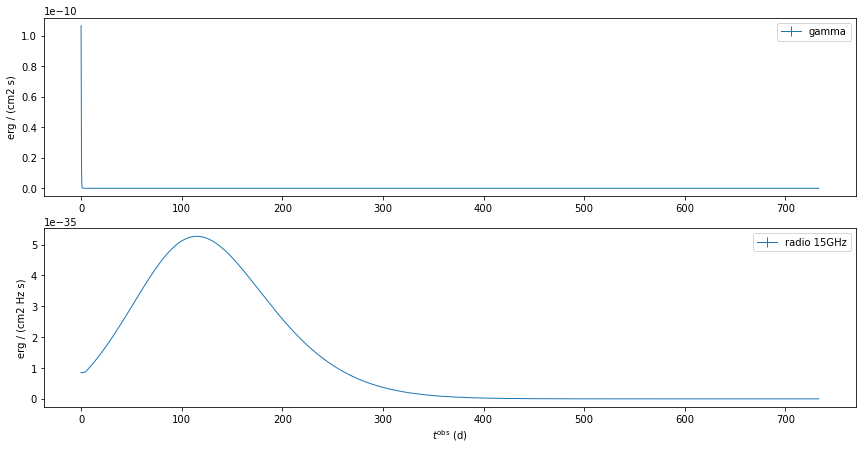

In [8]:
plot_lcs(exp_lcs='temp_ev_sim_exp_change_beta/lc_obs_beta_exp=0.001.pkl',lcs_names=['lg_obs','lr_obs_15GHz'],flare_lcs=None)
